In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

In [2]:
# Набор данных взят с https://www.kaggle.com/aashi20/top-50-spotify-songs
# Top-50 песен в Spotify в 2019 году.
raw_dataset = pd.read_csv("datasets/top50.csv")
raw_dataset.head(10)

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [3]:
dataset = pd.DataFrame()

In [4]:
# столбец Beats.Per.Minute
data = raw_dataset['Beats.Per.Minute'] 

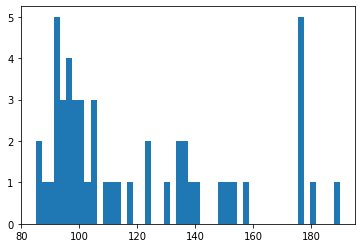

In [5]:
plt.hist(data , bins = 50)
plt.show()

In [6]:
# не вижу никаких проблем - оставлю этот без изменений
dataset['Beats.Per.Minute'] = data

In [7]:
# cтолбец Artist.Name
data = raw_dataset['Artist.Name'] 

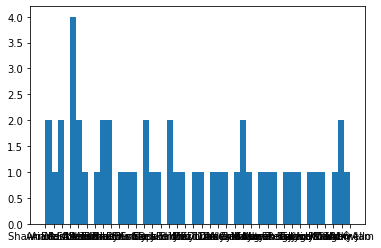

In [8]:
plt.hist(data , bins = 50)
plt.show()

In [9]:
# проблема № 6 применим метод унитарного кодирования т.к. значения можно 
# рассмотреть как категории
data = pd.get_dummies(data)

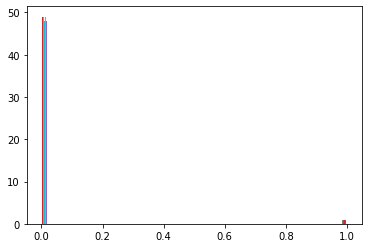

In [10]:
plt.hist(data , bins = 50)
plt.show()

In [11]:
dataset = dataset.join(data)

In [12]:
# столбец Genre
data = raw_dataset['Genre'] 

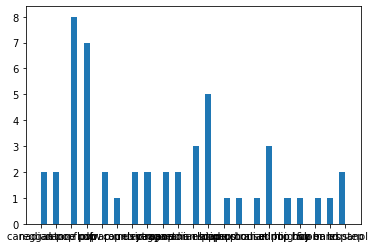

In [13]:
plt.hist(data , bins = 50)
plt.show()

In [14]:
# проблема № 6 применим метод унитарного кодирования т.к. значения можно 
# рассмотреть как категории
data = pd.get_dummies(data)

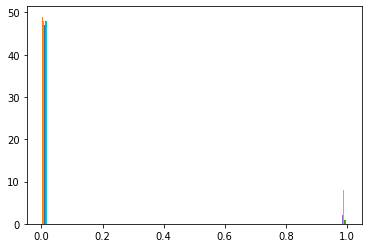

In [15]:
plt.hist(data , bins = 50)
plt.show()

In [16]:
dataset = dataset.join(data)

In [17]:
dataset.head(10)

,Beats.Per.Minute,Ali Gatie,Anuel AA,Ariana Grande,Bad Bunny,Billie Eilish,Chris Brown,DJ Snake,Daddy Yankee,Drake,...,electropop,escape room,latin,panamanian pop,pop,pop house,r&b en espanol,reggaeton,reggaeton flow,trap music
0,117,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,105,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,190,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,93,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,150,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,102,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,180,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,111,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,136,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,135,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [18]:
data = raw_dataset['Energy']

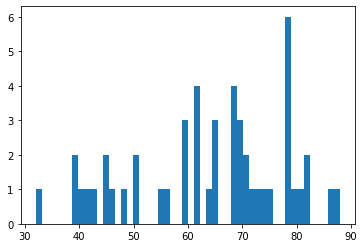

In [19]:
plt.hist(data , bins = 50)
plt.show()

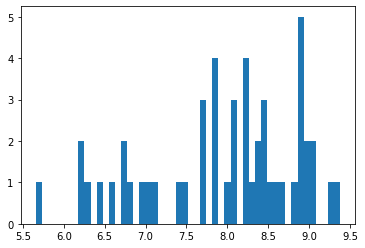

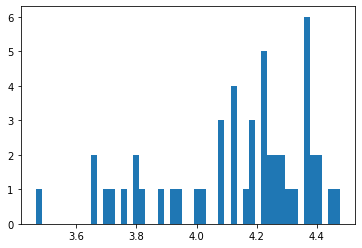

In [20]:
# Наблюдаем проблему №3 - неравномерное распределение
plt.hist(data ** 0.5, bins = 50)
plt.show()

plt.hist(np.log(data), bins = 50)
plt.show()

In [21]:
# Применим извлечение квадратного корня.
data = data ** 0.5

In [22]:
dataset['Energy'] = data

In [23]:
# столбец Danceability
data = raw_dataset['Danceability']

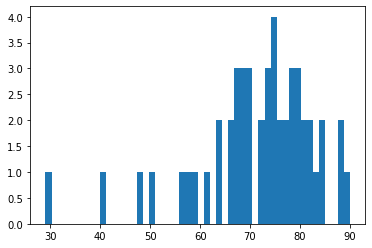

In [24]:
plt.hist(data , bins = 50)
plt.show()

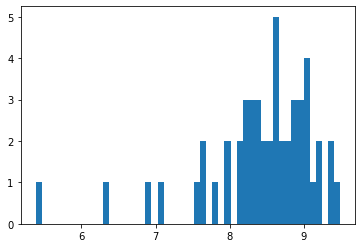

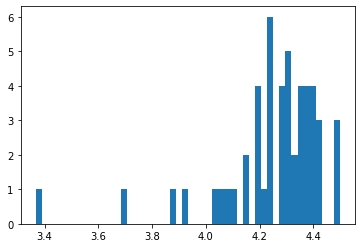

In [25]:
# Наблюдаем проблему №3 - неравномерное распределение
plt.hist(data ** 0.5, bins = 50)
plt.show()

plt.hist(np.log(data), bins = 50)
plt.show()

In [26]:
# Применим извлечение квадратного корня.
data = data ** 0.5

In [27]:
# проблема № 4 поэтмоу немного урежу интвервал значений
data = np.clip(data,6.5,10)

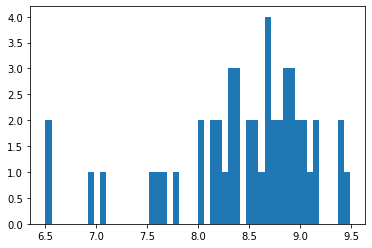

In [28]:
plt.hist(data , bins = 50)
plt.show()

In [29]:
dataset['Danceability'] = data

In [30]:
# столбец Loudness..dB..
data = raw_dataset['Loudness..dB..']

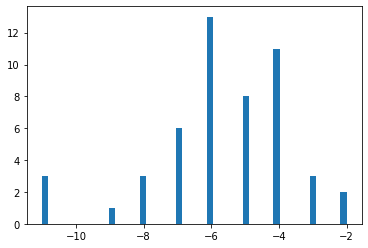

In [31]:
plt.hist(data , bins = 50)
plt.show()

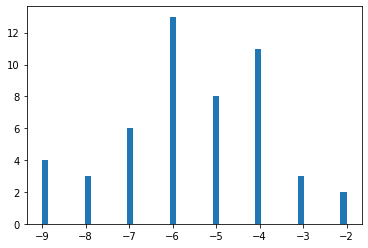

In [32]:
# проблема № 4 поэтмоу немного урежу интвервал значений
data = np.clip(data,-9,-1)

plt.hist(data , bins = 50)
plt.show()

In [33]:
dataset['Loudness..dB..'] = data

In [34]:
data = raw_dataset['Liveness']

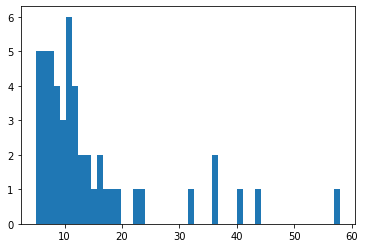

In [35]:
plt.hist(data , bins = 50)
plt.show()

In [36]:
# проблема № 4 поэтмоу немного урежу интвервал значений
data = np.clip(data,1,45)

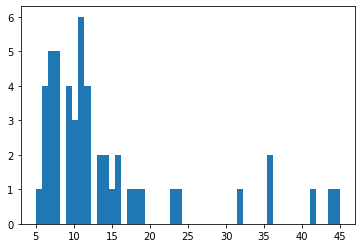

In [37]:
plt.hist(data , bins = 50)
plt.show()

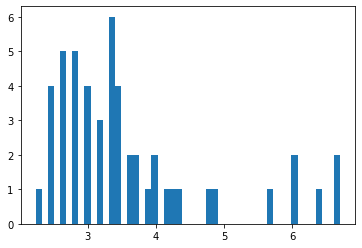

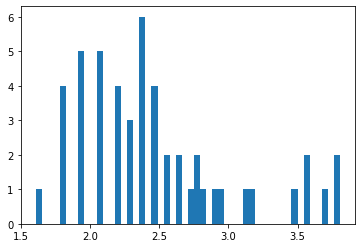

In [38]:
# Наблюдаем проблему №3 - неравномерное распределение
plt.hist(data ** 0.5, bins = 50)
plt.show()

plt.hist(np.log(data), bins = 50)
plt.show()

In [39]:
# применим логарифм
data = np.log(data)

In [40]:
dataset['Liveness'] = data